In [ ]:
#import libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the bodyfat.csv file using pandas and storing it in df.
df = pd.read_csv("/content/drive/MyDrive/Smart watch prices.csv")

In [ ]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [ ]:
df.isna().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [ ]:
# Replace null values in object columns with mode
object_columns = df. select_dtypes(include=["object"]). columns
for col in object_columns:
    mode_value = df[col].mode()[0]
    df [col] = df[col].fillna(mode_value)
# Replace null values in float column with mean
float_column = df. select_dtypes(include=["float64"]).columns
for col in float_column:
    mean_value = df[col].mean ( )
    df [col] = df[col]. fillna(mean_value)

In [ ]:
df = df. rename(columns={
'Display Size (inches)' : 'Display Size',
'Water Resistance (meters)': 'Water Resistance',
'Battery Life (days)' : 'Battery Life',
'Price (USD)' : 'Price'
})

In [ ]:

df['Water Resistance'].unique()


array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

In [ ]:
df['Water Resistance'].describe()

count     379
unique      7
top        50
freq      276
Name: Water Resistance, dtype: object

In [ ]:
df['Water Resistance'] = df['Water Resistance'].replace({'Not specified' : '50'})

In [ ]:
df['Display Size'].unique()

array([1.9       , 1.4       , 1.3       , 1.58      , 1.28      ,
       1.43      , 1.75      , 1.39      , 1.36316489, 1.65      ,
       1.2       , 1.57      , 1.        , 1.78      , 1.91      ,
       1.38      , 1.06      , 1.35      , 1.34      , 0.9       ,
       1.04      , 1.64      , 1.19      , 4.01      , 1.6       ,
       1.42      , 2.1       , 1.23      , 1.1       , 1.22      ,
       1.5       , 1.36      , 1.32      ])

In [ ]:
df['Display Size'] =df['Display Size'].round(1)

In [ ]:
df['Battery Life'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [ ]:
df['Battery Life'].describe()

count     379
unique     30
top        14
freq       84
Name: Battery Life, dtype: object

In [ ]:
df['Battery Life'] =df['Battery Life'].replace({'48 hours' : '14', 'Unlimited' : '14'})

In [ ]:
df['Price']=df['Price'].str[1:]

In [ ]:
# Remove commas and spaces from the 'Price' column
df['Price'] = df['Price'].replace({',': '', ' ': ''}, regex=True)

# Convert the 'water Resistance', 'Battery Life', and 'Price' columns to float
df['Water Resistance'] = df['Water Resistance'].astype(float)
df['Battery Life'] = df['Battery Life'].astype(float)
df['Price'] = df['Price'].astype(float)


In [ ]:
lb = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
  df[col] = lb.fit_transform(df[col])

In [ ]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
0,1,127,34,2,17,1.9,27,50.0,18.0,0,1,1,399.0
1,30,36,31,2,0,1.4,31,50.0,40.0,0,1,1,249.0
2,8,105,9,1,0,1.3,30,50.0,11.0,0,1,0,399.0
3,6,109,7,1,0,1.6,19,50.0,6.0,0,1,1,229.0
4,7,43,31,1,0,1.3,30,30.0,24.0,0,1,1,299.0


In [ ]:
df.describe(include='all')

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.0,379.000000,379.00000,379.000000
mean,18.168865,68.606860,20.778364,1.203166,6.941953,1.368074,22.139842,52.804749,12.208443,0.0,0.920844,0.83905,312.910290
std,13.040757,38.933753,11.407946,0.532927,8.978918,0.219087,9.080415,26.939235,12.326042,0.0,0.270338,0.36797,202.163738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,1.500000,1.000000,0.0,0.000000,0.00000,49.000000
25%,7.000000,33.500000,9.000000,1.000000,0.000000,1.200000,17.500000,50.000000,3.000000,0.0,1.000000,1.00000,199.000000
50%,16.000000,71.000000,27.000000,1.000000,0.000000,1.400000,23.000000,50.000000,11.000000,0.0,1.000000,1.00000,279.000000
75%,31.000000,102.000000,31.000000,1.000000,14.000000,1.400000,32.000000,50.000000,15.000000,0.0,1.000000,1.00000,329.000000
max,41.000000,136.000000,34.000000,4.000000,26.000000,4.000000,35.000000,200.000000,72.000000,0.0,1.000000,1.00000,1800.000000


<ipython-input-68-3b3c042b7acd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_brands, y=counts, palette="muted")
<ipython-input-68-3b3c042b7acd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


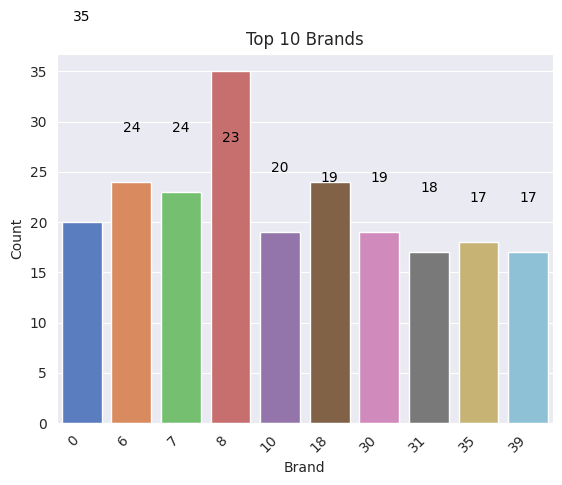

In [ ]:
# Get top ten brands
top_brands = df['Brand'].value_counts().index[:10]
counts = df['Brand'].value_counts().values[:10]

# Set the style
sns.set_style("darkgrid")

# Create the bar plot using Seaborn
ax = sns.barplot(x=top_brands, y=counts, palette="muted")

# Set the x-tick labels to be rotated and aligned properly
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add value labels on the bars
for i, v in enumerate(counts):
    ax.text(i, v+5, str(v), color='black', ha='center')

# Set the axis labels and title
ax.set(xlabel='Brand', ylabel='Count', title='Top 10 Brands')

# Display the plot
plt.show()


<ipython-input-69-53ada83336fa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns. barplot(x=top_os, y=os_counts, palette='magma')


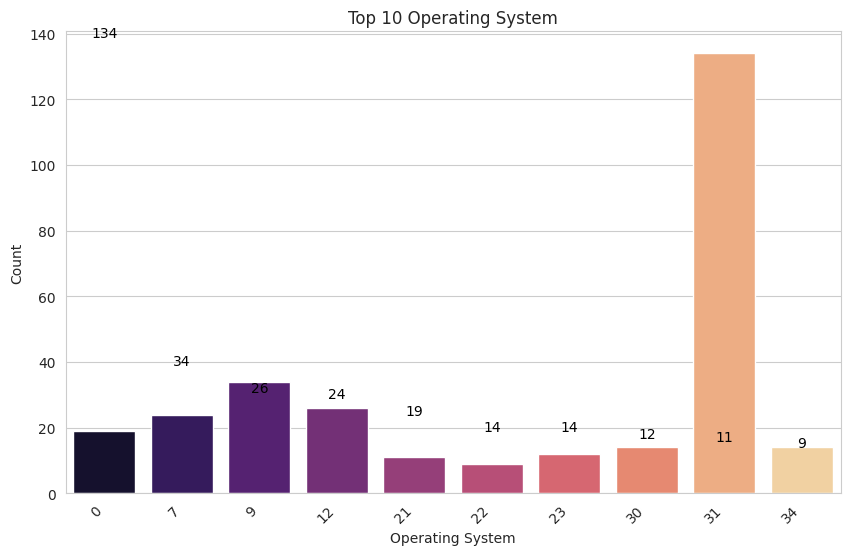

In [ ]:
# Set the plot style
sns.set_style('whitegrid')
# Get the top 10 operating systems
top_os = df['Operating System'].value_counts().index[:10]
os_counts = df['Operating System'].value_counts().values[:10]
# Create the bar plot
fig, ax = plt. subplots(figsize=(10, 6))
ax = sns. barplot(x=top_os, y=os_counts, palette='magma')
# Set the axis labels and title
ax.set(xlabel='Operating System', ylabel='Count', title='Top 10 Operating System')
# Rotate x-axis tick labels
plt.xticks (rotation=45, ha= 'right')
# Add labels to the bars
for i, v in enumerate(os_counts):
    ax.text (i, v+5, str(v), color= 'black', ha= 'center')
#Display the plot
plt.show()

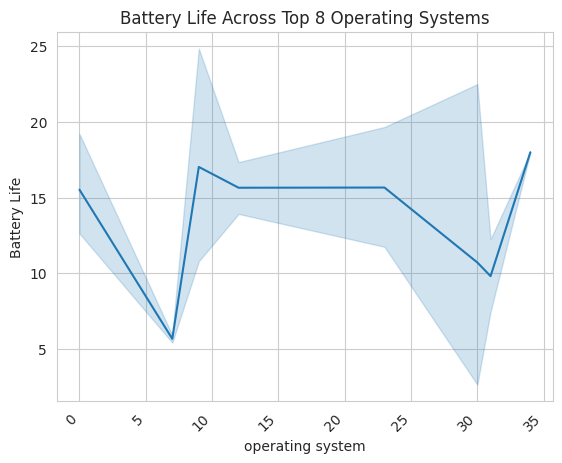

In [ ]:
# Filter the top 8 operating systems by frequency count
top_operating_systems = df['Operating System']. value_counts().head(8).index.tolist()
data_top_operating_systems = df[df['Operating System'].isin(top_operating_systems) ]
# Set the plot style
sns.set_style( 'whitegrid')
# Create the line plot
sns. lineplot(x='Operating System', y='Battery Life', data=data_top_operating_systems)
# Set the axis labels and title
plt.xlabel ('operating system')
plt. ylabel ('Battery Life')
plt.title('Battery Life Across Top 8 Operating Systems')
# Align x-axis labels
plt.xticks(rotation=45, ha='right' )
# Display the plot|
plt.show()

<ipython-input-71-c970fcd1867f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=top_brands, palette='Set3', ax=axes[0])


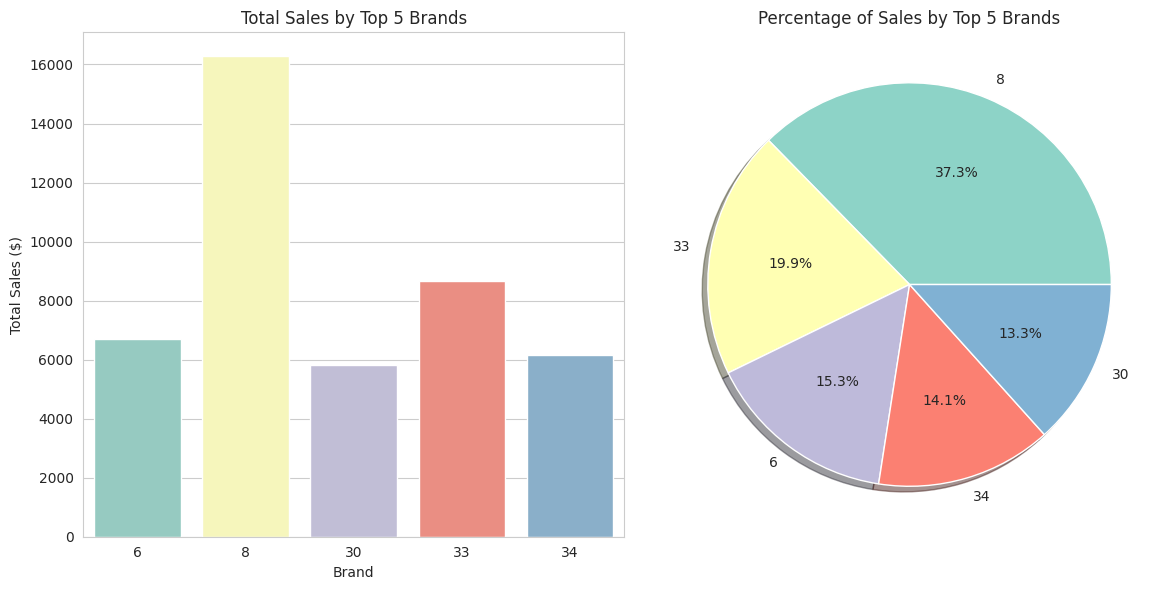

In [ ]:
#calculate total sales for each brand
total_sales = df.groupby('Brand')['Price'].sum().reset_index()

#Sort the brands by total sales in descending order
top_brands = total_sales.sort_values('Price', ascending=False).head(5)

#Calculate the percentage of sales for each brand
top_brands['Percent'] = top_brands['Price']/top_brands['Price'].sum() * 100

# Create a grid with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#Plot a bar chart for total sales by brand
sns.barplot(x='Brand', y='Price', data=top_brands, palette='Set3', ax=axes[0])
axes[0].set_xlabel('Brand')

axes[0].set_ylabel('Total Sales ($)')
axes[0].set_title('Total Sales by Top 5 Brands')

#Plot a pie chart for percentage of sales by brand
colors = sns.color_palette('Set3', top_brands.shape[0]).as_hex()
axes[1].pie(top_brands['Percent'], labels=top_brands['Brand'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Percentage of Sales by Top 5 Brands')

#Adjust spacing between subplots
fig.tight_layout()

#Show the plot
plt.show()

In [ ]:
# X consists of independent variables
X = df.drop(['Price'],axis=1)
X

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC
0,1,127,34,2,17,1.9,27,50.0,18.0,0,1,1
1,30,36,31,2,0,1.4,31,50.0,40.0,0,1,1
2,8,105,9,1,0,1.3,30,50.0,11.0,0,1,0
3,6,109,7,1,0,1.6,19,50.0,6.0,0,1,1
4,7,43,31,1,0,1.3,30,30.0,24.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
374,38,79,32,1,16,1.4,21,50.0,30.0,0,0,1
375,41,132,33,2,0,1.4,32,50.0,15.0,0,1,1
376,9,119,12,1,0,1.4,32,50.0,25.0,0,1,1
377,26,118,5,1,0,1.6,17,50.0,14.0,0,0,1


In [ ]:
y = df['Price']
y

0      399.0
1      249.0
2      399.0
3      229.0
4      299.0
       ...  
374    279.0
375    349.0
376    249.0
377    159.0
378    299.0
Name: Price, Length: 379, dtype: float64

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 12)
(76, 12)
(303,)
(76,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
dtr = DecisionTreeRegressor(max_depth=2, min_samples_split=6,min_samples_leaf=5)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=6)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 50,max_depth = 8,min_weight_fraction_leaf = 0.05,
                            max_features = 0.8,random_state = 42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.06,max_depth=2,subsample=0.7,
                   colsample_bytree=0.4,colsample_bylevel=0.5,
                   max_leaves=3,random_state=1)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.4,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=3, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:


# Assuming you have already trained your DecisionTreeRegressor as 'dtr'
lr.fit(X_train, y_train)

# Obtain predictions on the training set
predict_train = lr.predict(X_train)

# Calculate and print performance metrics
error_score_lr_train = r2_score(y_train, predict_train)
print("R2 error is:", error_score_lr_train)

mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print("Root Mean Squared Error is:", rmse_lr_train)


R2 error is: 0.22955466324713591
Root Mean Squared Error is: 179.89481395578443


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predict_test = lr_model.predict(X_test)

# Calculate and print performance metrics for the test set
error_score_lr_test = r2_score(y_test, predict_test)
print("R2 error on the test set is:", error_score_lr_test)

mse = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse)
print("Root Mean Squared Error on the test set is:", rmse_lr_test)



R2 error on the test set is: 0.057121703744744234
Root Mean Squared Error on the test set is: 200.19629377149596


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_train' and 'y_train' are your training set features and target variable
# Assuming 'dtr' is your trained decision tree regression model
predict_train_dtr = dtr.predict(X_train)

# Calculate and print performance metrics for the training set
error_score_dtr_train = r2_score(y_train, predict_train_dtr)
print("R2 error is: ", error_score_dtr_train)

mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_train)



R2 error is:  0.3387326887955302
Root Mean Squared Error: 162.83567426724855


In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_test' and 'y_test' are your test set features and target variable
# Assuming 'dtr' is your trained decision tree regression model
predict_test_dtr = dtr.predict(X_test)

# Calculate and print performance metrics for the test set
error_score_dtr_test = r2_score(y_test, predict_test_dtr)
print("R2 error is: ", error_score_dtr_test)

mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)


R2 error is:  0.21290956944462147
Root Mean Squared Error: 182.91129720942288


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_train' and 'y_train' are your training set features and target variable
# Assuming 'rfr' is your trained random forest regression model
predict_train_rfr = rfr.predict(X_train)

# Calculate and print performance metrics for the training set
error_score_rfr_train = r2_score(y_train, predict_train_rfr)
print("R2 error is:", error_score_rfr_train)

mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)


R2 error is: 0.48966923521052297
Root Mean Squared Error: 143.0496846113081


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_test' and 'y_test' are your test set features and target variable
# Assuming 'rfr' is your trained Random Forest Regressor model
predict_test_rfr = rfr.predict(X_test)

# Calculate and print performance metrics for the testing set
error_score_rfr_test = r2_score(y_test, predict_test_rfr)
print("R2 error is:", error_score_rfr_test)

mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)


R2 error is: 0.5152275826832362
Root Mean Squared Error: 143.5480060367846


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_train' and 'y_train' are your training set features and target variable
# Assuming 'gbr' is your trained Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()  # You may adjust parameters based on your needs
gbr.fit(X_train, y_train)

# Make predictions on the training set
predict_train_gbr = gbr.predict(X_train)

# Calculate and print performance metrics for the training set
error_score_gbr_train = r2_score(y_train, predict_train_gbr)
print("R2 error is:", error_score_gbr_train)

mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)


R2 error is: 0.944301879591386
Root Mean Squared Error: 47.258648703048635


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test', and 'y_test' are your training and test sets
# Assuming 'gbr' is your trained Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()  # You may adjust parameters based on your needs
gbr.fit(X_train, y_train)


# Make predictions on the test set
predict_test_gbr = gbr.predict(X_test)

# Calculate R2 score and mean squared error for the test set
error_score_gbr_test = r2_score(y_test, predict_test_gbr)
print("R2 error for test set is:", error_score_gbr_test)

mse_test = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse_test)
print('Root Mean Squared Error for test set:', rmse_gbr_test)


R2 error for test set is: 0.8254128699225945
Root Mean Squared Error for test set: 86.14584327120366


In [ ]:

import xgboost as xgb  # Assuming you have XGBoost installed
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'X_train' and 'y_train' are your training set features and target variable
# Assuming 'xgb' is your trained XGBoost model
xgb_model = xgb.XGBRegressor()  # You may adjust parameters based on your needs
xgb_model.fit(X_train, y_train)

# Make predictions on the training set
predict_train_xgb = xgb_model.predict(X_train)

# Calculate and print performance metrics for the training set
error_score_xgb_train = r2_score(y_train, predict_train_xgb)
print("R2 error is: ", error_score_xgb_train)

mse = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_train)



R2 error is:  0.9948688844424364
Root Mean Squared Error: 14.343889380529765


In [ ]:


# testing score
predict_test_xgb = xgb_model.predict(X_test)  # Assuming xgb_model is your trained XGBoost model

error_score_xgb_test = r2_score(y_test, predict_test_xgb)
print("R2 error is: ", error_score_xgb_test)

mse = mean_squared_error(y_test, predict_test_xgb)  # Corrected the variable name
rmse_xgb_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_test)


R2 error is:  0.27336825375675344
Root Mean Squared Error: 175.74597914787833


In [ ]:
import pandas as pd

results = pd.DataFrame(columns=['Model', 'Training R2', 'Testing R2', 'Training RMSE', 'Testing RMSE'])
results.loc[0] = ['Linear Regression', error_score_lr_train, error_score_lr_test, rmse_lr_train, rmse_lr_test]
results.loc[1] = ['Decision Tree Regressor', error_score_dtr_train, error_score_dtr_test, rmse_dtr_train, rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor', error_score_rfr_train, error_score_rfr_test, rmse_rfr_train, rmse_rfr_test]
results.loc[3] = ['Gradient Boosting Regressor', error_score_gbr_train, error_score_gbr_test, rmse_gbr_train, rmse_gbr_test]
results.loc[4] = ['XG Boost Regressor', error_score_xgb_train, error_score_xgb_test, rmse_xgb_train, rmse_xgb_test]
print(results)



                         Model  Training R2  Testing R2  Training RMSE  \
0            Linear Regression     0.229555    0.057122     179.894814   
1      Decision Tree Regressor     0.338733    0.212910     162.835674   
2      Random Forest Regressor     0.489669    0.515228     143.049685   
3  Gradient Boosting Regressor     0.944302    0.825413      47.258649   
4           XG Boost Regressor     0.994869    0.273368      14.343889   

   Testing RMSE  
0    200.196294  
1    182.911297  
2    143.548006  
3     86.145843  
4    175.745979  


In [ ]:
import pickle

# Assuming 'xgb_model' is your trained XGBoost model
with open('sw.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
